In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
import seaborn as sns
import glob


dir = "D:/Ziwei/Github/STdata/Resolve files"
data = pd.read_csv("D:/Ziwei/Github/STdata/STdata_dis.csv", dtype={'Time': str})

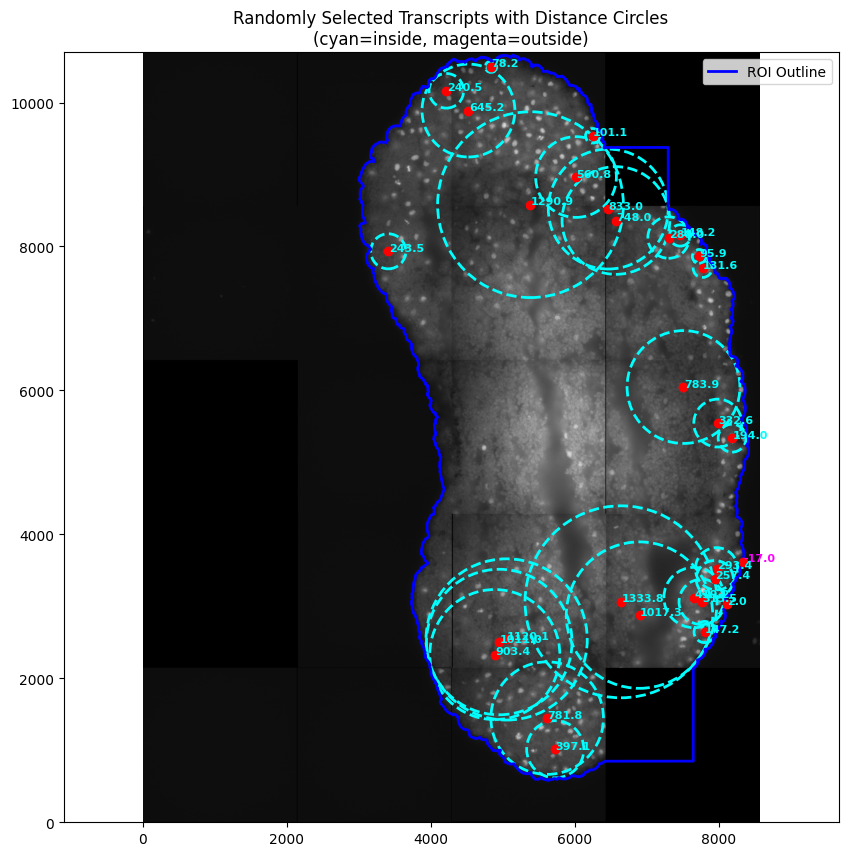

In [40]:
img = imread(f"{dir}/10_5/MC1_27032024_W4A3_R8_DAPI.tiff")
vertices = np.loadtxt(f"{dir}/10_5/sliceVertices10_5.dat")

# Select transcripts from time 22
subset = data[data['Time'] == '10_5']

# Randomly select 10 transcripts
sampled_points = subset.sample(n=30, random_state=42).copy()

# Plot image and outline
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray', origin='lower')

# Plot the outline
plt.plot(vertices[:, 0], vertices[:, 1], 'b-', linewidth=2, label='ROI Outline')

# Plot sampled transcripts and distance circles
for _, row in sampled_points.iterrows():
    x, y = row['x'], row['y']
    dist = row['Distance_To_Outline']

    # Transcript location
    plt.plot(x, y, 'ro')

    # Distance circle (absolute value, color indicates sign)
    circle_color = 'cyan' if dist > 0 else 'magenta'
    circle = plt.Circle((x, y), abs(dist), color=circle_color, fill=False, linewidth=2, linestyle='--')
    plt.gca().add_patch(circle)

    # Add distance annotation
    plt.text(x + 5, y + 5, f"{dist:.1f}", color=circle_color, fontsize=8, weight='bold')

plt.axis('equal')
plt.title('Randomly Selected Transcripts with Distance Circles\n'
          '(cyan=inside, magenta=outside)')
plt.legend()
plt.show()

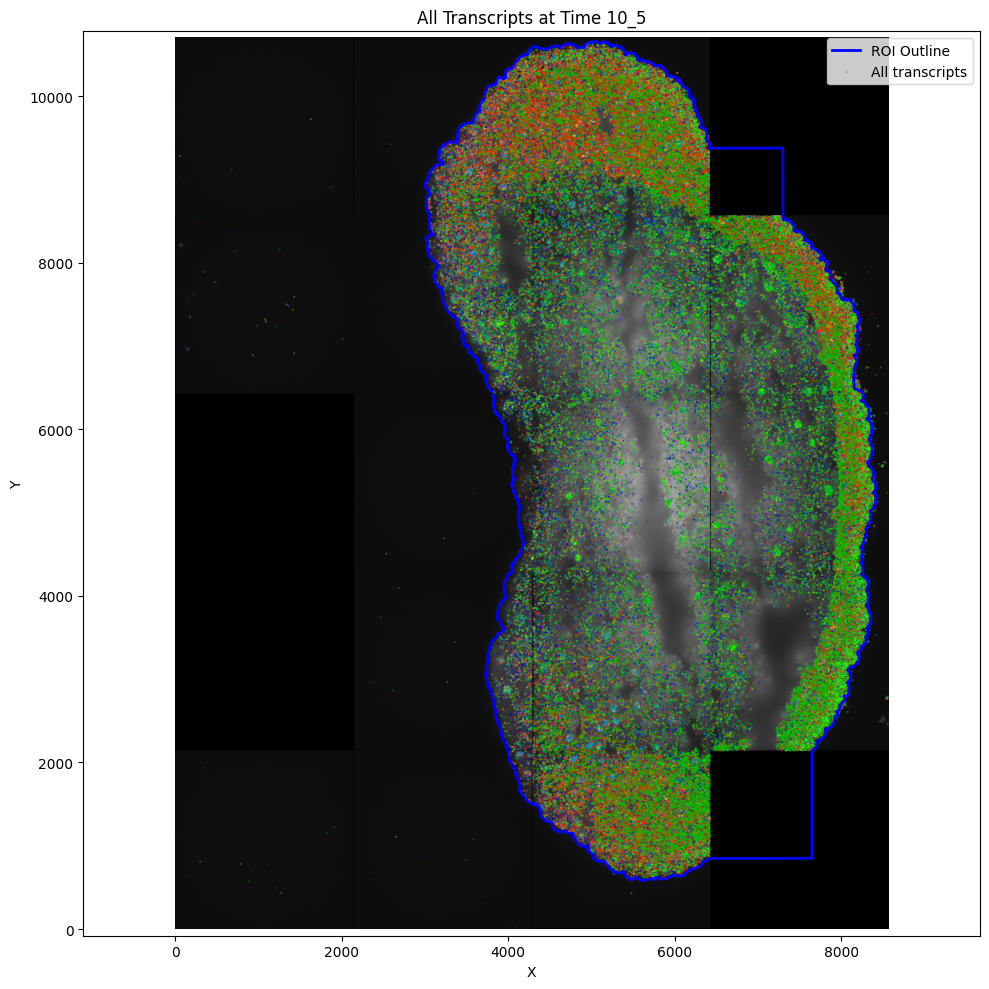

In [41]:

# Filter transcripts for time '10_5'
subset = data[data['Time'].astype(str) == '10_5'].copy()

# --- Plot ---
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray', origin='lower')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-', linewidth=2, label='ROI Outline')

# Scatter all transcripts
plt.scatter(subset['x'], subset['y'],c=subset['gene'].astype('category').cat.codes, cmap='nipy_spectral', s=0.1, alpha=0.5, label='All transcripts')

plt.title("All Transcripts at Time 10_5")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [54]:
print(np.sort(data["gene"].unique()))

['FP 1' 'FP 107' 'FP 111' 'FP 112' 'FP 113' 'FP 115' 'FP 124' 'FP 16'
 'FP 21' 'FP 26' 'FP 34' 'FP 36' 'FP 38' 'FP 41' 'FP 42' 'FP 43' 'FP 49'
 'FP 53' 'FP 57' 'FP 65' 'FP 79' 'FP 84' 'FP 85' 'FP 89' 'FP 90' 'FP 94'
 'FP 95' 'FP 98' 'ano1.L' 'arl2bp.L' 'atp1b2' 'atp6v0c.L' 'atp6v1g3.S'
 'camk1.L' 'ccnb1.2.L' 'ccnb1.L' 'ccnb1.S' 'ccno.S' 'cfap298.L' 'chga.L'
 'cirbp.S' 'clcn1.S' 'col1a2.S' 'col4a5.L' 'col6a5.S' 'cplx2.L' 'dbh.S'
 'dlc.L' 'dll1.L' 'dll1.S' 'dmrt2.L' 'dnaaf4.L' 'dnali1.S' 'dynll1.L'
 'ebf3.L' 'emx2.L' 'epcam.L' 'eps8l3.S' 'esrrg.L' 'fam166c.S' 'fn1.S'
 'foxa1.L' 'foxa1.S' 'foxc2.S' 'foxi1.L' 'foxi1.S' 'foxj1.L' 'foxj1.S'
 'gadd45a.L' 'gpx3.S' 'grhl3.L' 'has1.S' 'hoxc10.L' 'hyal1.L' 'hyal2.S'
 'hyal4.L' 'itln1.L' 'kcna4.S' 'klf17.1.S' 'klf4.L' 'krt18.1.S' 'krt19.L'
 'krt7.S' 'krt70.S' 'krt8.1.L' 'ldhb.S' 'lypd2.L' 'marcks.S' 'mcidas.L'
 'mcidas.S' 'mgst3.L' 'msln.L' 'msx2.L' 'myb.S' 'mycbp.S' 'notch1.L'
 'notch1.S' 'pcdh20.S' 'pfn1.L' 'piezo1.L' 'piezo1.S' 'pou3f1.S'
 'pou

In [28]:
genes = {'kcna4.S'}
genes_data = data[data['gene'].isin(genes)].copy()

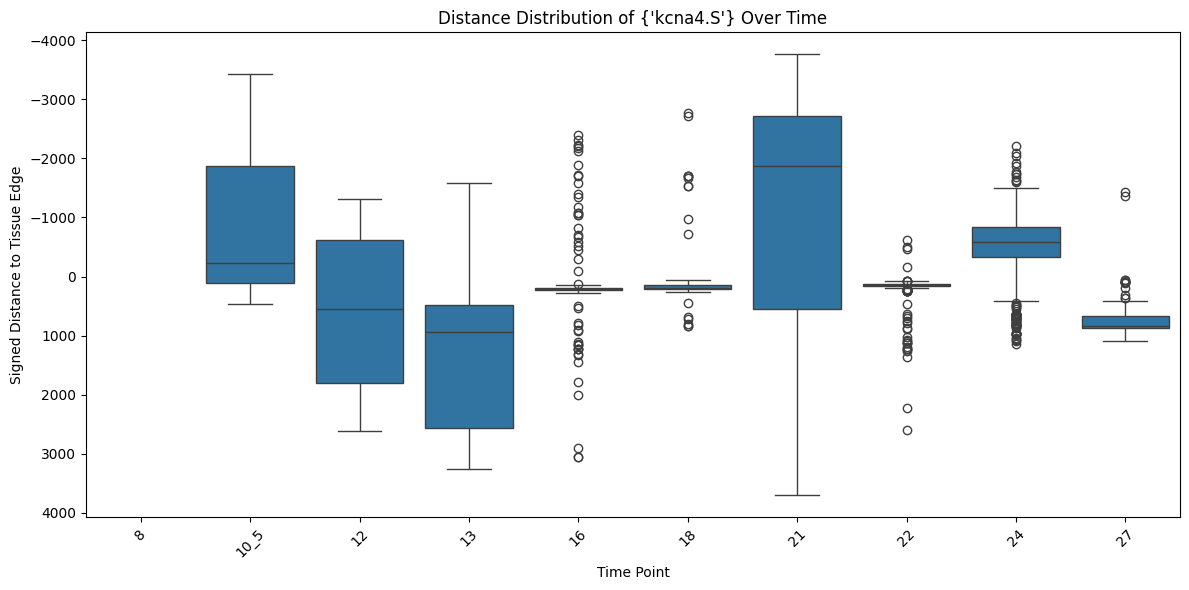

In [29]:
# Ensure Time is treated as a string for sorting and display
genes_data['Time'] = genes_data['Time'].astype(str)

# Optional: sort time labels numerically if possible
sorted_times = sorted(genes_data['Time'].unique(), key=lambda x: float(x.replace('_', '.')))

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=genes_data, x='Time', y='Distance_To_Outline', order=sorted_times)
plt.title(f'Distance Distribution of {genes} Over Time')
plt.xlabel('Time Point')
plt.ylabel('Signed Distance to Tissue Edge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

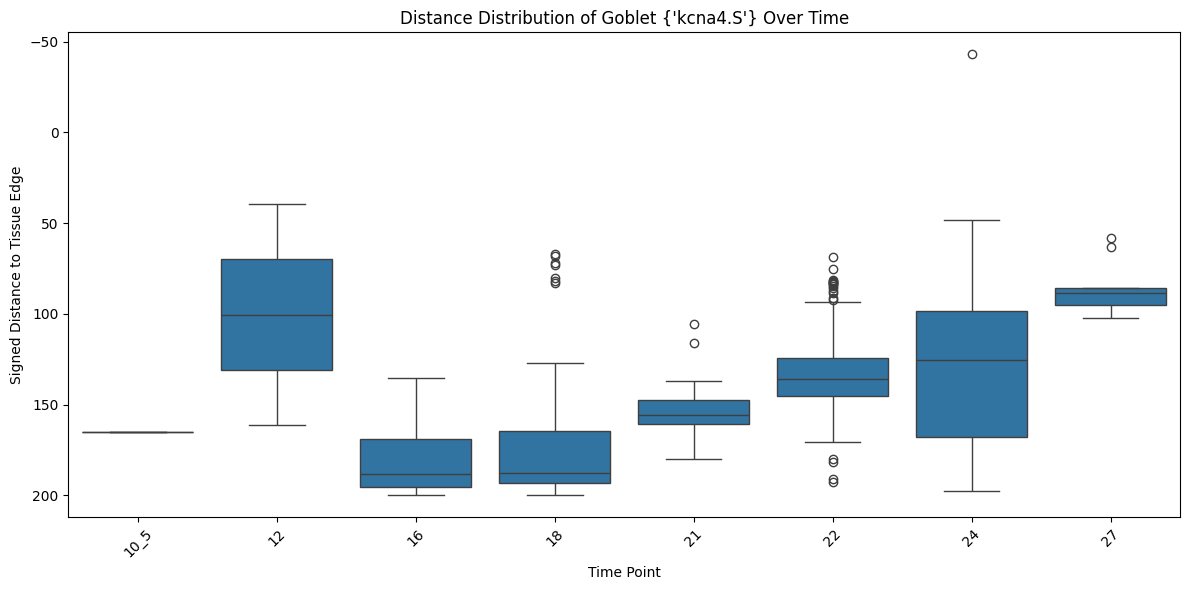

In [30]:
genes_data = genes_data[(genes_data['Distance_To_Outline'] > -50) & 
                          (genes_data['Distance_To_Outline'] < 200)]

# Sort time points numerically
sorted_times = sorted(genes_data['Time'].unique(), key=lambda x: float(x.replace('_', '.')))

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=genes_data, x='Time', y='Distance_To_Outline', order=sorted_times)
plt.title(f'Distance Distribution of Goblet {genes} Over Time')
plt.xlabel('Time Point')
plt.ylabel('Signed Distance to Tissue Edge')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [11]:
def plot_gene_spatial(data, dir, genes, time, max_distance=None, min_distance=None):
    """
    Plot spatial distribution of transcripts for given genes at a specific timepoint.
    
    Parameters:
    - data: pandas DataFrame containing spatial transcript data.
    - dir: base directory containing subfolders by time (e.g., '22', '21', etc.)
    - genes: single gene (str) or a set of gene names
    - time: string or int representing the timepoint
    """
    time_str = str(time)
    genes = {genes} if isinstance(genes, str) else set(genes)

    # Construct paths
    dapi_path = f"{dir}/{time_str}"
    dapi_file = glob.glob(f"{dapi_path}/*DAPI.tiff")
    outline_file = glob.glob(f"{dapi_path}/sliceVertices*.dat")

    if not dapi_file or not outline_file:
        print(f"⚠️ Missing file(s) for time {time_str}")
        return

    img = imread(dapi_file[0])
    vertices = np.loadtxt(outline_file[0])

    # Subset data
    subset = data[(data['Time'].astype(str) == time_str) & (data['gene'].isin(genes))]
    if min_distance and max_distance is not None:

        subset = data[
            (data['Time'].astype(str) == time_str) &
            (data['gene'].isin(genes)) &
            (data['Distance_To_Outline'] > min_distance) &
            (data['Distance_To_Outline'] < max_distance)
        ].copy()
    # Plot
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray', origin='lower')
    plt.plot(vertices[:, 0], vertices[:, 1], 'y-', linewidth=2, label='ROI Outline')

    plt.scatter(subset['x'], subset['y'], c='red', s=8, label=', '.join(genes), alpha=0.7)

    plt.title(f'Transcripts of {", ".join(genes)} at Time {time_str}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

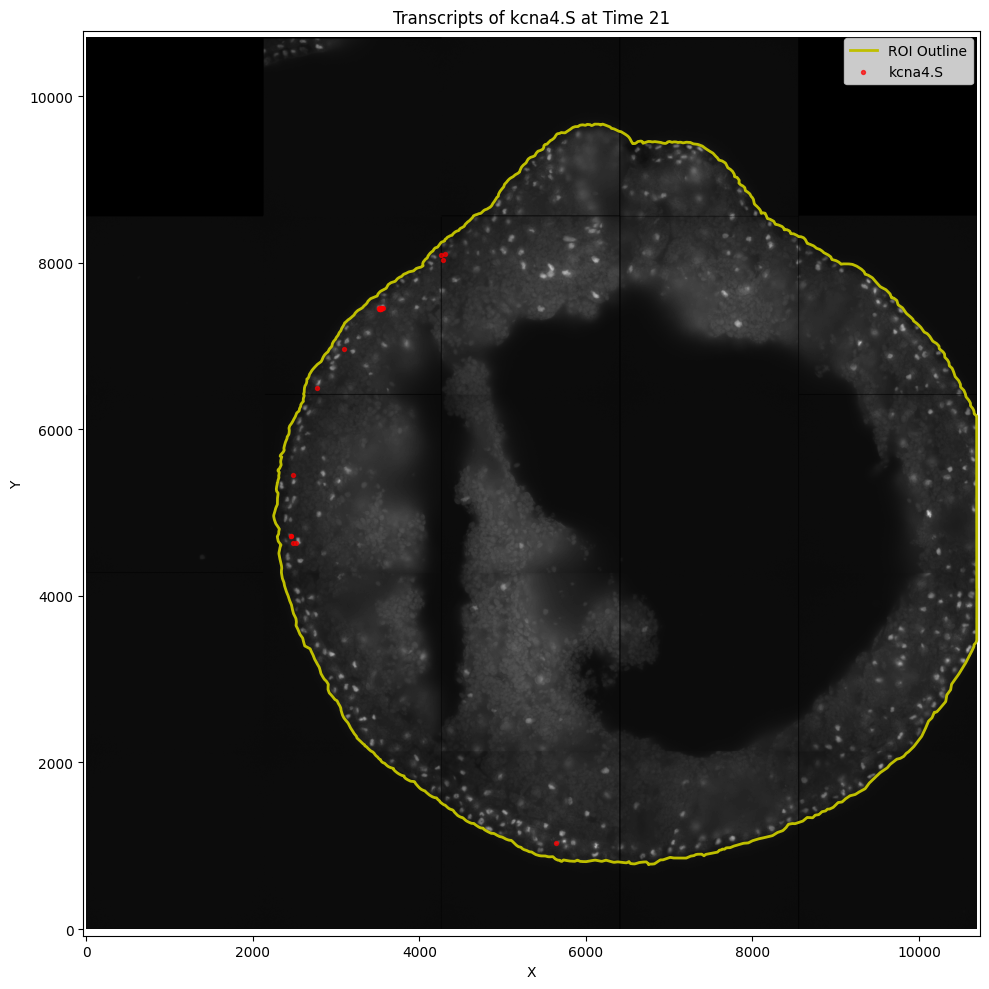

In [44]:
plot_gene_spatial(data, dir, genes=genes, time='21', max_distance=200, min_distance=-50)

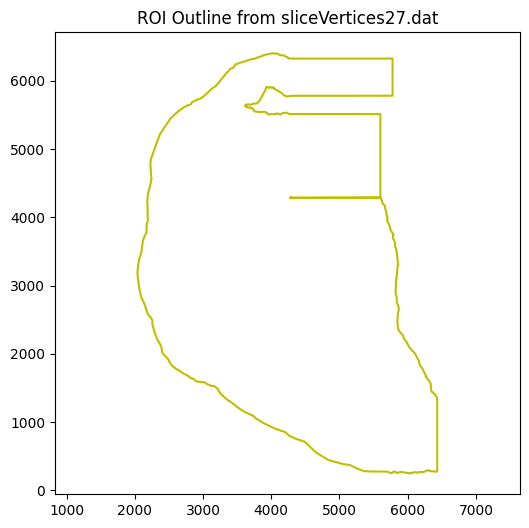

In [31]:
import numpy as np
import matplotlib.pyplot as plt

vertices = np.loadtxt("D:/Ziwei/Github/STdata/Resolve files/27/sliceVertices27.dat")

plt.figure(figsize=(6, 6))
plt.plot(vertices[:, 0], vertices[:, 1], 'y-')
plt.title('ROI Outline from sliceVertices27.dat')
plt.axis('equal')
plt.show()


In [33]:
import numpy as np



# Find long sequences of constant x or y (i.e., straight lines)
threshold = 5  # how many repeated values to consider as a line
lines = []

for axis in [0, 1]:  # 0 = x, 1 = y
    values = vertices[:, axis]
    diffs = np.diff(values)
    constant_mask = np.abs(diffs) < 1e-6  # check for no change
    indices = np.where(constant_mask)[0]

    group = []
    for i in range(len(indices) - 1):
        if indices[i + 1] == indices[i] + 1:
            group.append(indices[i])
        else:
            if len(group) >= threshold:
                line_segment = vertices[group[0]:group[-1] + 2]
                lines.append((axis, line_segment))
            group = []

# Print the detected flat line segments
for i, (axis, segment) in enumerate(lines):
    axis_name = 'X' if axis == 0 else 'Y'
    print(f"\nLine {i+1} (flat {axis_name}):")
    print(segment)



Line 1 (flat X):
[[5621. 4253.]
 [5621. 4252.]
 [5621. 4251.]
 [5621. 4250.]
 [5621. 4249.]
 [5621. 4248.]
 [5621. 4247.]
 [5621. 4246.]
 [5621. 4245.]]

Line 2 (flat X):
[[5622. 4243.]
 [5622. 4242.]
 [5622. 4241.]
 [5622. 4240.]
 [5622. 4239.]
 [5622. 4238.]
 [5622. 4237.]
 [5622. 4236.]
 [5622. 4235.]
 [5622. 4234.]]

Line 3 (flat X):
[[5669. 4168.]
 [5669. 4167.]
 [5669. 4166.]
 [5669. 4165.]
 [5669. 4164.]
 [5669. 4163.]
 [5669. 4162.]
 [5669. 4161.]
 [5669. 4160.]
 [5669. 4159.]
 [5669. 4158.]
 [5669. 4157.]
 [5669. 4156.]
 [5669. 4155.]
 [5669. 4154.]
 [5669. 4153.]
 [5669. 4152.]
 [5669. 4151.]
 [5669. 4150.]
 [5669. 4149.]]

Line 4 (flat X):
[[5670. 4147.]
 [5670. 4146.]
 [5670. 4145.]
 [5670. 4144.]
 [5670. 4143.]
 [5670. 4142.]
 [5670. 4141.]
 [5670. 4140.]
 [5670. 4139.]
 [5670. 4138.]
 [5670. 4137.]
 [5670. 4136.]
 [5670. 4135.]
 [5670. 4134.]
 [5670. 4133.]
 [5670. 4132.]
 [5670. 4131.]
 [5670. 4130.]
 [5670. 4129.]
 [5670. 4128.]
 [5670. 4127.]
 [5670. 4126.]]

Line 5 (